# Probabilistic Time Series Analysis

## Week 4: EM Algorithm

---

Places where you are supposed to fill in code are marked

    #
    # TODO: some instructions
    # 
    
The rest of the code we will run and discuss if time permits, otherwise try it out at home and try to answer the questions mentioned in the text boxes for yourself.

### This week's assignment is optional, since it depends on last week's work. Still, give it a try!

---

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
import pylab
from pykalman import KalmanFilter
from pykalman.datasets import load_robot
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal

%matplotlib inline

## Part I: Data Generation

We will use a common physics problem with a twist. This example will involve firing a ball from a cannon at at 45-degree angle at a muzzle velocity of 100 units/sec. However, we will also have a camera that will record the ball's position from the side every second. The positions measured from the camera have significant measurement error. We also have precise detectors in the ball that give the X and Y velocity every second.

Latent Variable $z = [pos_x, pos_y, V_x, V_y]$

Observed Variable $x = [\hat{pos}_x, \hat{pos}_y, \hat{V}_x, \hat{V}_y]$

Referece: http://greg.czerniak.info/guides/kalman1/


In [2]:
x = [0, 7.0710678118654755, 14.142135623730951, 21.213203435596427, 28.284271247461902, 35.35533905932738, 42.42640687119285, 49.49747468305833, 56.568542494923804, 63.63961030678928, 70.71067811865476, 77.78174593052023, 84.8528137423857, 91.92388155425118, 98.99494936611666, 106.06601717798213, 113.13708498984761, 120.20815280171308, 127.27922061357856, 134.35028842544403, 141.4213562373095, 148.49242404917499, 155.56349186104046, 162.63455967290594, 169.7056274847714, 176.7766952966369, 183.84776310850236, 190.91883092036784, 197.9898987322333, 205.0609665440988, 212.13203435596427, 219.20310216782974, 226.27416997969522, 233.3452377915607, 240.41630560342617, 247.48737341529164, 254.55844122715712, 261.6295090390226, 268.70057685088807, 275.77164466275354, 282.842712474619, 289.9137802864845, 296.98484809834997, 304.05591591021545, 311.1269837220809, 318.1980515339464, 325.2691193458119, 332.34018715767735, 339.4112549695428, 346.4823227814083, 353.5533905932738, 360.62445840513925, 367.6955262170047, 374.7665940288702, 381.8376618407357, 388.90872965260115, 395.9797974644666, 403.0508652763321, 410.1219330881976, 417.19300090006305, 424.26406871192853, 431.335136523794, 438.4062043356595, 445.47727214752496, 452.54833995939043, 459.6194077712559, 466.6904755831214, 473.76154339498686, 480.83261120685233, 487.9036790187178, 494.9747468305833, 502.04581464244876, 509.11688245431424, 516.1879502661798, 523.2590180780453, 530.3300858899108, 537.4011537017764, 544.4722215136419, 551.5432893255074, 558.614357137373, 565.6854249492385, 572.756492761104, 579.8275605729696, 586.8986283848351, 593.9696961967006, 601.0407640085662, 608.1118318204317, 615.1828996322972, 622.2539674441628, 629.3250352560283, 636.3961030678938, 643.4671708797594, 650.5382386916249, 657.6093065034904, 664.680374315356, 671.7514421272215, 678.822509939087, 685.8935777509525, 692.9646455628181, 700.0357133746836, 707.1067811865491, 714.1778489984147, 721.2489168102802, 728.3199846221457, 735.3910524340113, 742.4621202458768, 749.5331880577423, 756.6042558696079, 763.6753236814734, 770.7463914933389, 777.8174593052045, 784.88852711707, 791.9595949289355, 799.0306627408011, 806.1017305526666, 813.1727983645321, 820.2438661763977, 827.3149339882632, 834.3860018001287, 841.4570696119943, 848.5281374238598, 855.5992052357253, 862.6702730475909, 869.7413408594564, 876.8124086713219, 883.8834764831875, 890.954544295053, 898.0256121069185, 905.096679918784, 912.1677477306496, 919.2388155425151, 926.3098833543806, 933.3809511662462, 940.4520189781117, 947.5230867899772, 954.5941546018428, 961.6652224137083, 968.7362902255738, 975.8073580374394, 982.8784258493049, 989.9494936611704, 997.020561473036, 1004.0916292849015, 1011.162697096767, 1018.2337649086326, 1025.304832720498, 1032.3759005323636, 1039.4469683442292, 1046.5180361560947, 1053.5891039679602]
y = [0, 6.972967811865475, 13.847835623730951, 20.624603435596427, 27.303271247461904, 33.88383905932738, 40.366306871192855, 46.750674683058335, 53.036942494923814, 59.22511030678929, 65.31517811865477, 71.30714593052025, 77.20101374238573, 82.9967815542512, 88.69444936611667, 94.29401717798214, 99.79548498984762, 105.1988528017131, 110.50412061357858, 115.71128842544405, 120.82035623730953, 125.831324049175, 130.74419186104046, 135.55895967290593, 140.2756274847714, 144.89419529663687, 149.41466310850234, 153.83703092036782, 158.1612987322333, 162.38746654409877, 166.51553435596423, 170.5455021678297, 174.4773699796952, 178.31113779156067, 182.04680560342615, 185.68437341529162, 189.2238412271571, 192.66520903902256, 196.00847685088803, 199.25364466275352, 202.40071247461898, 205.44968028648447, 208.40054809834993, 211.2533159102154, 214.00798372208087, 216.66455153394634, 219.22301934581182, 221.6833871576773, 224.04565496954277, 226.30982278140823, 228.4758905932737, 230.54385840513916, 232.51372621700463, 234.3854940288701, 236.15916184073558, 237.83472965260106, 239.41219746446652, 240.891565276332, 242.27283308819744, 243.5560009000629, 244.7410687119284, 245.82803652379386, 246.81690433565933, 247.7076721475248, 248.50033995939026, 249.19490777125574, 249.7913755831212, 250.2897433949867, 250.69001120685215, 250.99217901871762, 251.19624683058308, 251.30221464244855, 251.31008245431403, 251.2198502661795, 251.03151807804497, 250.74508588991043, 250.3605537017759, 249.87792151364138, 249.29718932550685, 248.61835713737233, 247.8414249492378, 246.96639276110326, 245.99326057296872, 244.9220283848342, 243.75269619669967, 242.48526400856514, 241.11973182043062, 239.65609963229608, 238.09436744416155, 236.434535256027, 234.67660306789247, 232.82057087975795, 230.86643869162342, 228.8142065034889, 226.66387431535435, 224.41544212721982, 222.0689099390853, 219.62427775095077, 217.08154556281625, 214.4407133746817, 211.70178118654718, 208.86474899841264, 205.9296168102781, 202.8963846221436, 199.76505243400905, 196.53562024587453, 193.20808805773999, 189.78245586960546, 186.2587236814709, 182.63689149333638, 178.91695930520186, 175.09892711706732, 171.1827949289328, 167.16856274079825, 163.05623055266372, 158.84579836452917, 154.53726617639464, 150.13063398826012, 145.62590180012558, 141.02306961199105, 136.3221374238565, 131.52310523572197, 126.62597304758744, 121.6307408594529, 116.53740867131836, 111.34597648318382, 106.05644429504929, 100.66881210691476, 95.18307991878022, 89.59924773064569, 83.91731554251115, 78.1372833543766, 72.25915116624206, 66.28291897810752, 60.208586789972976, 54.03615460183844, 47.7656224137039, 41.39699022556936, 34.930258037434825, 28.365425849300287, 21.70249366116575, 14.941461473031213, 8.082329284896677, 1.1250970967621399, 0, 0, 0, 0, 0, 0]
nx = [-55.891836789860065, -8.619869715037396, 42.294527931003934, -19.282331191905236, 15.680071645375804, 69.254448170858, 89.33867920263654, 28.666899505436437, 15.757974418210033, 56.95110872477952, 119.04246497636771, 61.62441951678902, 39.29934181599181, 138.7343828583496, 96.51963541398798, 117.86368373222598, 67.09014965331974, 135.85134345741767, 121.0077151824216, 162.7264612213607, 118.09485999718689, 161.3851623148557, 153.61801317724127, 138.04480650773763, 136.57674149045124, 186.64610285009547, 190.4353428154434, 187.08542653674456, 179.34131017012345, 203.60872317676595, 230.44206917637285, 200.5851735051386, 188.42133059532134, 232.7400979104982, 225.30478119739485, 267.2756895668691, 203.85938526332433, 283.3059183111086, 243.60174631799248, 255.04877235779932, 298.9707904316639, 269.8143043032952, 252.32059784738885, 270.55891357039184, 326.59494694358125, 327.44121025500505, 323.8788885796068, 342.8998939277302, 284.8080106831782, 308.30384319438355, 331.602751441996, 369.37448486134394, 326.7534721557288, 432.3093248477627, 406.1850938379638, 368.3192718477926, 417.1242042573391, 376.80066629284977, 328.070404259563, 453.310935909394, 428.1929004969645, 387.52306470654355, 455.6351576860221, 455.4826886731417, 425.56091814116144, 464.50297459897234, 473.83062985528187, 508.0018220206407, 538.1473047813328, 474.1768111706383, 487.07340663957956, 513.8908741322764, 504.02223767836966, 533.5666187993398, 475.84484473401085, 540.774394416208, 532.450138885039, 596.1973293350309, 616.4286469911126, 571.2502050174375, 490.3795627036758, 595.1192153241902, 565.0843289032891, 565.8861393244426, 535.3381668961649, 554.494293004607, 614.8000696382559, 610.6070255172268, 595.1137023505969, 655.8549550650116, 652.1364054115451, 627.0822281047308, 684.8459180830978, 627.4287726057535, 646.4232572721058, 649.8096669791199, 713.6046684169744, 698.0070989016643, 670.0057860355556, 652.4216425995312, 676.1048509824369, 716.7538322065785, 755.4377489437768, 721.282075245216, 710.0104845231749, 727.173927219191, 728.0409503769652, 765.4419988280144, 714.4351907609439, 780.131570018707, 788.9558247395082, 826.4452430146916, 753.5313843631791, 772.7596204233874, 816.0768173822422, 827.2783309068349, 813.59413380325, 868.0575409685421, 819.297427582733, 842.4657416222495, 886.9452546786852, 848.0810151733698, 840.3562201041242, 814.5238953430719, 909.815296516205, 932.007124918161, 920.1521325921302, 894.7381254084694, 898.8234101267616, 916.4237616794475, 909.8509105807899, 959.775584291071, 913.833379291161, 928.6214973254758, 1023.4704479915798, 972.8771173177097, 929.6006265282693, 922.4096220769878, 965.6499344468668, 1004.1043594740715, 998.0662730766439, 990.0011025721882, 1003.1192778598809, 958.761271165956, 1014.5513285266792, 1102.4832378048654, 1009.1078733361437, 1045.4004495002835, 969.8376930757283, 1023.9209108407833]
ny = [23.580712916615695, -45.62854499965875, -48.454167220387774, 57.63682593281395, 24.958737249448383, -75.44208650853136, 26.41512511354887, 49.05382536552557, 119.5753276811912, -8.883926248926471, 68.61653476275158, 73.70930930561039, 73.33534997643633, 136.46569500850046, 84.65157143902442, 116.75120295727146, 64.03491049317876, 83.17721636270467, 67.48086927886698, 114.0031414926982, 126.98883515540626, 141.94465033561954, 121.4932906407089, 82.17340012376054, 171.20366262408706, 140.86199817266035, 156.15800993843771, 205.18083992090502, 201.76590950501574, 120.00689401909713, 127.22410828056267, 174.70956131509004, 148.2365665374927, 145.51245102878624, 176.1302017047836, 185.20777488199408, 162.6018916409635, 201.10110170021446, 151.66614689027648, 219.42574853381643, 146.53360660925895, 172.0394862006801, 205.89640027275198, 228.51657142871176, 233.09734143057807, 196.9051845126125, 217.61161160052148, 176.2328457551726, 232.91906774032418, 194.05143658995405, 212.54799704705485, 237.58982040493999, 248.06683550872324, 194.1313367493484, 234.10914455708777, 260.9183828690817, 241.38145360438665, 234.18839201094602, 298.7156304059963, 229.37945966087958, 150.42222803196753, 276.519008189128, 254.65250291987843, 276.76968161072347, 236.66608705629918, 252.7664567709944, 300.2402250565306, 265.79289722004, 206.71833433177704, 230.80064422085013, 282.21969317504124, 278.7505962073449, 264.65420420047275, 269.1414531557679, 300.78849412505315, 290.40324997636577, 228.4884963762248, 255.06136385539696, 224.79305441888243, 190.58455654967446, 236.9316778500026, 237.1642802017231, 197.04061689021333, 243.08831859311766, 298.69768812880136, 253.7179052734462, 214.9052914066147, 206.4070815355148, 236.37282969584498, 256.212452196932, 227.34374697096126, 245.96074526312518, 228.28624137197147, 293.80645840131524, 223.3350286792413, 189.11490296131603, 173.18703394374444, 224.19402293984098, 201.5893028879243, 196.71922438575157, 191.29908495274748, 181.68302817527396, 189.5274869883944, 223.8798616894293, 174.03835368022368, 225.8029667750153, 243.32963834156004, 161.72407829159798, 195.87525096604634, 128.4947824255718, 125.03030538969553, 178.94162993285272, 178.69848164174897, 163.25298077414635, 120.14847616048053, 156.19072198888165, 111.86292881870203, 123.53293860987199, 149.80320169931565, 137.76193157426053, 123.56291412411045, 122.88482052173731, 169.4024959581775, 113.64420024942245, 75.95358936834089, 112.73548045966685, 89.77944981081296, 132.3832257220346, 118.28500887622158, 41.80194386445528, 72.97395976865779, 27.564707182159275, 41.944224628335874, 35.26542969310611, 43.441159853568024, 48.784181310168904, 52.156577913216324, 25.654795701109094, 61.6957571291634, 50.6070208231052, 71.1942426060467, 85.42901900020982, -23.71494481685784, 36.536539251335405, 21.97545137095642, -16.352874522717297, -20.656788404218812, -27.959598326260984, 10.981406961205966, -12.446671920156849]
vel_x = [70.71067811865476 for _ in range(len(nx))]
vel_y = [70.71067811865474, 69.72967811865475, 68.74867811865475, 67.76767811865476, 66.78667811865476, 65.80567811865477, 64.82467811865477, 63.84367811865477, 62.86267811865477, 61.88167811865477, 60.90067811865477, 59.919678118654765, 58.938678118654764, 57.95767811865476, 56.97667811865476, 55.99567811865476, 55.01467811865476, 54.033678118654755, 53.052678118654754, 52.07167811865475, 51.09067811865475, 50.10967811865475, 49.12867811865475, 48.147678118654746, 47.166678118654744, 46.18567811865474, 45.20467811865474, 44.22367811865474, 43.24267811865474, 42.261678118654736, 41.280678118654734, 40.29967811865473, 39.31867811865473, 38.33767811865473, 37.35667811865473, 36.375678118654726, 35.394678118654724, 34.41367811865472, 33.43267811865472, 32.45167811865472, 31.470678118654718, 30.489678118654716, 29.508678118654714, 28.527678118654713, 27.54667811865471, 26.56567811865471, 25.584678118654708, 24.603678118654706, 23.622678118654704, 22.641678118654703, 21.6606781186547, 20.6796781186547, 19.698678118654698, 18.717678118654696, 17.736678118654694, 16.755678118654693, 15.774678118654693, 14.793678118654693, 13.812678118654693, 12.831678118654693, 11.850678118654693, 10.869678118654694, 9.888678118654694, 8.907678118654694, 7.926678118654694, 6.945678118654694, 5.964678118654694, 4.983678118654694, 4.0026781186546945, 3.0216781186546946, 2.0406781186546947, 1.0596781186546946, 0.07867811865469454, -0.9023218813453056, -1.8833218813453056, -2.8643218813453055, -3.8453218813453054, -4.826321881345305, -5.807321881345305, -6.788321881345305, -7.769321881345305, -8.750321881345306, -9.731321881345306, -10.712321881345305, -11.693321881345305, -12.674321881345305, -13.655321881345305, -14.636321881345305, -15.617321881345305, -16.598321881345306, -17.579321881345308, -18.56032188134531, -19.54132188134531, -20.522321881345313, -21.503321881345315, -22.484321881345316, -23.465321881345318, -24.44632188134532, -25.42732188134532, -26.408321881345323, -27.389321881345325, -28.370321881345326, -29.351321881345328, -30.33232188134533, -31.31332188134533, -32.29432188134533, -33.275321881345334, -34.256321881345336, -35.23732188134534, -36.21832188134534, -37.19932188134534, -38.18032188134534, -39.161321881345344, -40.142321881345346, -41.12332188134535, -42.10432188134535, -43.08532188134535, -44.06632188134535, -45.047321881345354, -46.028321881345356, -47.00932188134536, -47.99032188134536, -48.97132188134536, -49.95232188134536, -50.933321881345364, -51.914321881345366, -52.89532188134537, -53.87632188134537, -54.85732188134537, -55.83832188134537, -56.819321881345374, -57.800321881345376, -58.78132188134538, -59.76232188134538, -60.74332188134538, -61.72432188134538, -62.705321881345384, -63.686321881345386, -64.66732188134539, -65.64832188134538, -66.62932188134538, -67.61032188134537, -68.59132188134537, -69.57232188134536, -70.55332188134535, -71.53432188134535, -72.51532188134534, -73.49632188134534, -74.47732188134533, -75.45832188134533]
data = np.array([nx,ny,vel_x,vel_y]).T

In [3]:
# Data Visualiztion
def plot_kalman(x, y, nx, ny, kx=None, ky=None, plot_type="r-", label=None):
    """Plot the trajectory and estimates if available."""
    if kx is not None and ky is not None:
        pylab.plot(x,y,'g-',nx,ny,'b.',kx,ky, plot_type)
    else:
        pylab.plot(x,y,'g-',nx,ny,'b.')

    pylab.xlabel('X position')
    pylab.ylabel('Y position')
    pylab.title('Parabola')
    if kx is not None and ky is not None and label is not None:
        pylab.legend(('true','measured', label))
    else:
        pylab.legend(('true','measured'))
    pylab.show()

def visualize_line_plot(data, xlabel, ylabel, title):
    """Line plot utility function."""
    pylab.plot(data)
    pylab.xlabel(xlabel)
    pylab.ylabel(ylabel)
    pylab.title(title)
    pylab.show()

(150, 4)


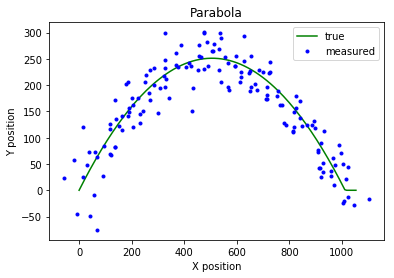

In [4]:
print(data.shape)
plot_kalman(x,y,nx,ny)

# Part II: EM Algorithm Implementation

In this part of the exercise, you will implement the EM algorithm for this LDS problem.

In [60]:
class MyKalmanFilter:
    """Kalman filter implementation."""
    
    def __init__(self, n_dim_state=2, n_dim_obs=2):
        """
        @param n_dim_state: dimension of the laten variables
        @param n_dim_obs: dimension of the observed variables
        """
        self.n_dim_state = n_dim_state
        self.n_dim_obs = n_dim_obs
        self.transition_matrices = np.eye(n_dim_state)
        self.transition_offsets = np.zeros(n_dim_state)
        self.transition_covariance = np.eye(n_dim_state)
        self.observation_matrices = np.eye(n_dim_obs, n_dim_state)
        self.observation_covariance = np.eye(n_dim_obs)
        self.observation_offsets = np.zeros(n_dim_obs)
        self.initial_state_mean = np.zeros(n_dim_state)
        self.initial_state_covariance = np.eye(n_dim_state)
        
    def filter(self, X):
        """
        Method that performs Kalman filtering
        @param X: a numpy 2D array whose dimension is [n_example, self.n_dim_obs]
        @output: filtered_state_means: a numpy 2D array whose dimension is [n_example, self.n_dim_state]
        @output: filtered_state_covariances: a numpy 3D array whose dimension is [n_example, self.n_dim_state, self.n_dim_state]
        """
        # Validate inputs
        n_example, observed_dim = X.shape
        assert observed_dim==self.n_dim_obs
        
        # Create holders for outputs
        filtered_state_means = np.zeros( (n_example, self.n_dim_state) )
        filtered_state_covariances = np.zeros( (n_example, 
                                                self.n_dim_state, 
                                                self.n_dim_state) )
        
        # The first state mean and state covariance is the initial expectation.
        # Initialize internal variables.
        current_state_mean = self.initial_state_mean.copy()
        current_state_covar = self.initial_state_covariance.copy()
        self.p_n_list = np.zeros((n_example, self.n_dim_obs, self.n_dim_obs))
        for i in range(1, n_example):
            current_observed_data = X[i,:]
            #
            # TODO: Fill in your code below.
            #
            # Run a single step forward filter:
            #   - Prediction step
            mean_z = self.transition_matrices.dot(current_state_mean)
            cov_zz = self.transition_matrices.dot(
                         current_state_covar).dot(
                         self.transition_matrices.T) + self.transition_covariance
            
            #   - Observation step
            mean_x = self.observation_matrices.dot(mean_z)
            cov_xx = self.observation_matrices.dot(cov_zz).dot(
                self.observation_matrices.T) + self.observation_covariance
            cov_zx = cov_zz.dot(self.observation_matrices.T) 
            K = cov_zx.dot(np.linalg.pinv(cov_xx))
            
            #   - Update step
            mean_z_condition_x = (mean_z 
                                  + K.dot(current_observed_data 
                                           - self.observation_matrices.dot(mean_z)))
            cov_z_condition_x = (cov_zz 
                                 - K.dot(self.observation_matrices).dot(cov_zz))
            
            current_state_mean = mean_z_condition_x
            current_state_covar = cov_z_condition_x
            
            filtered_state_means[i, :] = mean_z_condition_x
            filtered_state_covariances[i, :, :] = cov_z_condition_x
            
            #   - Populate holders
            self.p_n_list[i, :, :] = self.observation_matrices.dot(cov_zz
                                                             ).dot(self.observation_matrices.T
                                                                  ) + self.observation_covariance
            
            
        return filtered_state_means, filtered_state_covariances
    
    
    def smooth(self, X):
        """
        Method that performs the Kalman Smoothing
        @param X: a numpy 2D array whose dimension is [n_example, self.n_dim_obs]
        @output: smoothed_state_means: a numpy 2D array whose dimension is [n_example, self.n_dim_state]
        @output: smoothed_state_covariances: a numpy 3D array whose dimension is [n_example, self.n_dim_state, self.n_dim_state]
        """
        # Validate inputs
        n_example, observed_dim = X.shape
        assert observed_dim==self.n_dim_obs
        
        # Initialize for EM
        self.F_n = []
        
        # Run the forward path
        mu_list, v_list = self.filter(X)
        
        # Create holders for outputs
        smoothed_state_means = np.zeros( (n_example, self.n_dim_state) )
        smoothed_state_covariances = np.zeros( (n_example, self.n_dim_state, self.n_dim_state) )
        
        #
        # TODO: Fill in your code below
        #
        # Last time step doesn't need to be updated.     
        # Run the backward path.
        # It's zero-indexed and we don't need to update the last elements.
        smoothed_state_means[-1, :] = mu_list[-1, :]
        smoothed_state_covariances[-1, :, :] = v_list[-1, :, :]

        for i in range(n_example-2, -1, -1):
            # Store intermediate results.
            # Calculate mu_bar and v_bar.
            # Propagate the holders.
            mean_iplus1_condition_i = self.transition_matrices.dot(mu_list[i, :])
            cov_iplus1_condition_i = self.transition_matrices.dot(
                                             v_list[i, :, :]).dot(
                                     self.transition_matrices.T) + self.transition_covariance
            F_i = v_list[i, :, :].dot(
                self.transition_matrices.T).dot(np.linalg.pinv(cov_iplus1_condition_i))
            
            current_mean = mu_list[i, :] + F_i.dot(smoothed_state_means[i+1, :] 
                                                   - mean_iplus1_condition_i)
            current_cov = (v_list[i, :, :]
                           + F_i.dot(smoothed_state_covariances[i+1, :, :] 
                                  - cov_iplus1_condition_i).dot(F_i.T)) 
                                   
            smoothed_state_means[i, :] = current_mean
            smoothed_state_covariances[i, :, :] = current_cov
            # Note that F_n is REVERSELY propagated from N-2 to 0 (zero-indexed).
            self.F_n.append(F_i)
        # Add the last F_n.
#         mean_iplus1_condition_i = self.transition_matrices.dot(mu_list[i, :])
#         cov_iplus1_condition_i = self.transition_matrices.dot(
#                                          v_list[i, :, :]).dot(
#                                  self.transition_matrices.T) + self.transition_covariance
#         F_i = v_list[i, :, :].dot(
#             self.transition_matrices.T).dot(np.linalg.inv(cov_iplus1_condition_i))
            
        self.F_n.append(F_i)
            
        return smoothed_state_means, smoothed_state_covariances
    
    
    def em(self, X, max_iter=10):
        """
        Method that perform the EM algorithm to update the model parameters
        Note that in this exercise we ignore offsets
        @param X: a numpy 2D array whose dimension is [n_example, self.n_dim_obs]
        @param max_iter: an integer indicating how many iterations to run
        """
        # Validate inputs
        n_example, observed_dim = X.shape
        assert observed_dim==self.n_dim_obs
        
        # Iterate through 
        self.avg_em_log_posterior = []
        for iter_num in range(max_iter):
            print(iter_num)
            # Expectation Step
            # Run the forward and backward path
            smoothed_state_means, smoothed_state_covariances = self.smooth(X)
            self.avg_em_log_posterior.append(np.nanmean(self.calculate_posterior(X, smoothed_state_means)))
            
            #
            # TODO: Fill in the code below
            #
            # Gather E[z_n], E[z_n z_{n-1}^T], E[z_n z_n^T]: be careful about how the latter two differ from the covariances!
            self.e_zn = [] # mu_i_cond_t
            self.e_zn_znminus = [] # var_i+1_cond_t * F_i + mu_i+1_cond_t * mu_i_cond_t.T
            self.e_zn_zn = [] # var_i_cond_t + mu_i_cond_t * mu_i_cond_t.T
            for i in range(n_example):
                self.e_zn.append(smoothed_state_means[i, :])
                self.e_zn_zn.append(smoothed_state_covariances[i, :, :] + smoothed_state_means[i, :].dot(smoothed_state_means[i, :].T))
                # E[z_n z_{n-1}^T] only has n-1 elements
                if i != 0:
                    self.e_zn_znminus.append(smoothed_state_covariances[i-1, :, :].dot(self.F_n[i]) 
                                             + smoothed_state_means[i-1, :].dot(smoothed_state_means[i, :].T))
            
            # Maximization Step
            # Update initial states and initial covariance
            self.initial_state_mean = smoothed_state_means[0, :]
            self.initial_state_covariance = smoothed_state_covariances[0, :]
            
            # Update transition matrix and transition covariance
            ezy = np.sum(np.array(self.e_zn_znminus), 0)
            ezz = np.sum(np.array(self.e_zn_zn), 0)
            ezz_minus_n = ezz - self.e_zn_zn[-1]
            ezz_minus_1 = ezz - self.e_zn_zn[0]
            #
            # TODO: Fill in the (two lines of) code below (refer to equations in the slides)
            # 
            self.transition_matrices = ezy.dot(np.linalg.pinv(ezz))
            ezy_a = np.matmul(ezy, self.transition_matrices.T)
            self.transition_covariance = np.zeros((self.n_dim_state, self.n_dim_state))
            for t in range(n_example-1):
#                 print(n_example, len(self.e_zn_zn))
                self.transition_covariance = (self.e_zn_zn[t+1] 
                                              + self.transition_matrices.
                                                    dot(self.e_zn_zn[t].
                                                    dot(self.transition_matrices.T))
                                             )
            print(self.e_zn_zn)
            print("self.transition_covariance\n\n", self.transition_covariance)
            
            self.transition_covariance = (self.transition_covariance 
                                          - np.sum(np.array(ezy_a), 0)
                                          - np.sum(np.array(ezy_a.T), 0)
                                         )
            self.transition_covariance /= n_example
            
            print("self.transition_covariance\n\n", self.transition_covariance)
            
            # Update emission matrix and emission covariance            
            x_zn = np.matmul(X.T, np.array(self.e_zn))
            self.observation_matrices = np.matmul(x_zn, np.linalg.pinv(ezz.T))      
            self.observation_covariance = np.zeros((self.n_dim_obs, self.n_dim_obs))
            for t in range(n_example):
                err = (
                    X[t]
                    - np.dot(self.observation_matrices, smoothed_state_means[t])
                )
                self.observation_covariance += (
                    np.outer(err, err) 
                    + np.dot(self.observation_matrices,
                         np.dot(smoothed_state_covariances[t],
                                self.observation_matrices.T))
                )
            self.observation_covariance /= n_example  
    
    def calculate_posterior(self, X, state_mean):
        """
        Method that calculates the log posterior
        @param X: a numpy 2D array whose dimension is [n_example, self.n_dim_obs]
        @param state_mean: a numpy 2D array whose dimension is [n_example, self.n_dim_state]
        @output: a numpy 1D array whose dimension is [n_example]
        """
        llh = []
        for i in range(1,len(state_mean)):
            normal_mean = np.dot(self.observation_matrices,
                                 np.dot(self.transition_matrices,
                                        state_mean[i-1]))
            
            
            print(self.observation_matrices)
            print(self.observation_covariance)
            normal_cov = np.matmul(
                    self.observation_matrices,
                    np.matmul(self.p_n_list[i],
                              self.observation_matrices.T)
                    ) + self.observation_covariance
            
            pdf_val = multivariate_normal.pdf(X[i], normal_mean, normal_cov)
            # replace 0 to prevent numerical underflow
            if pdf_val < 1e-10:
                pdf_val = 1e-10
            llh.append(np.log(pdf_val))            
        return np.array(llh)

## Validation

In [61]:
iters = 20
kf = KalmanFilter(n_dim_state=data.shape[1], n_dim_obs=data.shape[1])
kf.em(data, n_iter=iters)
my_kf = MyKalmanFilter(4,4)
my_kf.em(data, max_iter=iters)

0
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1.

[array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]]), array([[6405.54653102, 6405.07439506, 6405.07439506, 6405.07439506],
       [6405.07439506, 6405.54653102, 6405.07439506, 6405.07439506],
       [6405.07439506, 6405.07439506, 6405.54653102, 6405.07439506],
       [6405.07439506, 6405.07439506, 6405.07439506, 6405.54653102]]), array([[8734.51242184, 8734.06157212, 8734.06157212, 8734.06157212],
       [8734.06157212, 8734.51242184, 8734.06157212, 8734.06157212],
       [8734.06157212, 8734.06157212, 8734.51242184, 8734.06157212],
       [8734.06157212, 8734.06157212, 8734.06157212, 8734.51242184]]), array([[9222.85111263, 9222.40336853, 9222.40336853, 9222.40336853],
       [9222.40336853, 9222.85111263, 9222.40336853, 9222.40336853],
       [9222.40336853, 9222.40336853, 9222.85111263, 9222.40336853],
       [9222.40336853, 9222.40336853, 9222.40336853, 9222.85111263]]), array([[9904.88811552, 9904.44082453, 9904.44082453, 9904.44082

LinAlgError: singular matrix

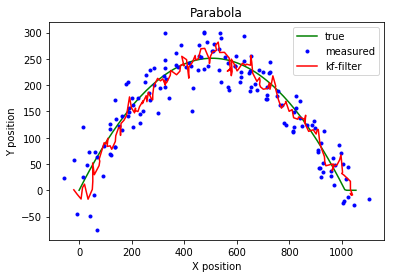

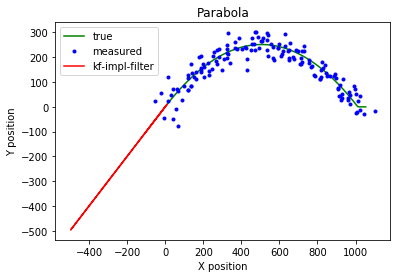

In [58]:
# Compare filtering results
filtered_state_means, filtered_state_covariances = kf.filter(data)
filtered_state_means_impl, filtered_state_covariances_impl = my_kf.filter(data)
plot_kalman(x,y,nx,ny, filtered_state_means[:,0], filtered_state_means[:,1], "r-", "kf-filter")
plot_kalman(x,y,nx,ny, filtered_state_means_impl[:,0], filtered_state_means_impl[:,1], "r-", "kf-impl-filter")

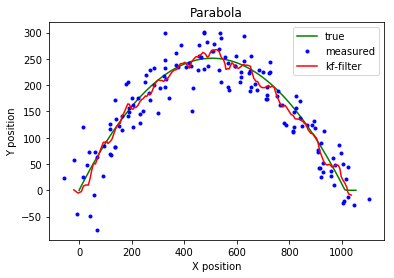

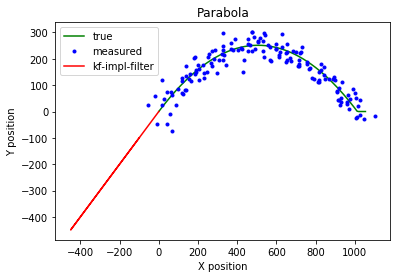

In [59]:
# Compare smoothing results
smoothed_state_means, smoothed_state_covariances = kf.smooth(data)
smoothed_state_means_impl, smoothed_state_covariances_impl = my_kf.smooth(data)
plot_kalman(x,y,nx,ny, smoothed_state_means[:,0], smoothed_state_means[:,1], "r-", "kf-filter")
plot_kalman(x,y,nx,ny, smoothed_state_means_impl[:,0], smoothed_state_means_impl[:,1], "r-", "kf-impl-filter")

In [ ]:
# Plot log-posterior
visualize_line_plot(my_kf.avg_em_log_posterior, "# iter", "avg log posterior", "Log Posteror Progress")

### Reference

Greg Czerniak's Website: Kalman Filters for Undergrads 1,
http://greg.czerniak.info/guides/kalman1/
